In [1]:
import pandas as pd
import sys
import json
import LLDA.model.labeled_lda as llda
import numpy as np
from scipy.spatial.distance import jensenshannon
from sklearn.metrics.pairwise import cosine_similarity


# sys.path.append('../')

In [2]:
# with open('FRIS_data.json') as f:
#     data = json.load(f)

# clean_data = {}
# for pro_id in data.keys():
#     if data[pro_id]['publications'] and data[pro_id]['disciplines']:
#         if 2 not in [len(disc) for disc in data[pro_id]['disciplines']]:
#             clean_data[pro_id] = data[pro_id]
# print(len(clean_data))

# pro_dis_list = []
# for pro_id in clean_data.keys():
#     pro_dis_list.extend(clean_data[pro_id]['disciplines'])
# pro_dis_set = set(pro_dis_list)

# pub_dis_list = []
# for pro_id in clean_data.keys():
#     for pub_id in clean_data[pro_id]['publications'].keys():
#         pub_dis_list.extend(clean_data[pro_id]['publications'][pub_id]['disciplines'])
# pub_dis_set = set(pub_dis_list)

# dis_set = pro_dis_set.intersection(pub_dis_set)

# while not len(pro_dis_set) == len(pub_dis_set) == len(dis_set):
#     pro_id_list = list(clean_data.keys())
#     for pro_id in pro_id_list:
#         if not set(clean_data[pro_id]['disciplines']).issubset(dis_set):
#             del clean_data[pro_id]

#     pro_id_list = list(clean_data.keys())
#     for pro_id in pro_id_list:
#         pubs = {}
#         for pub_id in clean_data[pro_id]['publications'].keys():
#             if clean_data[pro_id]['publications'][pub_id]['disciplines'] and clean_data[pro_id]['publications'][pub_id]['authors']:
#                 if set(clean_data[pro_id]['publications'][pub_id]['disciplines']).issubset(dis_set):
#                     pubs[pub_id] = clean_data[pro_id]['publications'][pub_id]
#         if pubs:
#             clean_data[pro_id]['publications'] = pubs
#         else:
#             del clean_data[pro_id]
#     print(len(clean_data))

#     pro_dis_list = []
#     for pro_id in clean_data.keys():
#         pro_dis_list.extend(clean_data[pro_id]['disciplines'])
#     pro_dis_set = set(pro_dis_list)

#     pub_dis_list = []
#     for pro_id in clean_data.keys():
#         for pub_id in clean_data[pro_id]['publications'].keys():
#             pub_dis_list.extend(clean_data[pro_id]['publications'][pub_id]['disciplines'])
#     pub_dis_set = set(pub_dis_list)

#     dis_set = pro_dis_set.intersection(pub_dis_set)

In [3]:
# def get_unique_dis(data):
#     disciplines = set()
#     for pro_id in data.keys():
#         disciplines.update(data[pro_id]['disciplines'])
#     return disciplines
# print(len(get_unique_dis(clean_data)))

# dis_dict = {}
# for dis in get_unique_dis(clean_data):
#     dis_dict[dis] = []
# for pro_id in clean_data.keys():
#     for dis in clean_data[pro_id]['disciplines']:
#         dis_dict[dis].append(pro_id)

# pro_id_list = [dis_dict[dis][0] for dis in dis_dict.keys()]
# sample_data = {pro_id: clean_data[pro_id] for pro_id in pro_id_list}
# print(len(get_unique_dis(sample_data)))

# pub_data = {}
# for pro_id in sample_data.keys():
#     for pub_id in sample_data[pro_id]['publications'].keys():
#         pub_data[pub_id] = sample_data[pro_id]['publications'][pub_id]
# print(len(get_unique_dis(pub_data)))

# rest = set(clean_data.keys()) - set(sample_data.keys())
# rest_data = {pro_id: clean_data[pro_id] for pro_id in rest}

# dis_dict = {}
# for dis in get_unique_dis(sample_data) - get_unique_dis(pub_data):
#     dis_dict[dis] = []
# for pro_id in rest_data.keys():
#     dis_set = set()
#     for pub in rest_data[pro_id]['publications'].values():
#         dis_set = dis_set.union(set(pub['disciplines']))
#     for dis in get_unique_dis(sample_data) - get_unique_dis(pub_data):
#         if dis in dis_set:
#             dis_dict[dis].append(pro_id)

# pro_id_list = [dis_dict[dis][0] for dis in dis_dict.keys()]
# sample_data.update({pro_id: clean_data[pro_id] for pro_id in pro_id_list})

# pub_data = {}
# for pro_id in sample_data.keys():
#     for pub_id in sample_data[pro_id]['publications'].keys():
#         pub_data[pub_id] = sample_data[pro_id]['publications'][pub_id]
# print(len(get_unique_dis(pub_data)))
# print(len(sample_data))

# # select a sample of the data such that the sample has at least one project for each discipline
# rest = set(clean_data.keys()) - set(sample_data.keys())
# rest_data = {pro_id: clean_data[pro_id] for pro_id in rest}
# num_test = int(0.25 * len(sample_data))

# train_data = sample_data
# test_data = {pro_id: clean_data[pro_id] for pro_id in list(rest_data.keys())[:num_test]}

# train_project_data = {}
# train_pub_data = []
# for pro_id in train_data.keys():
#     train_project_data[pro_id] = (train_data[pro_id]['abstract'], train_data[pro_id]['disciplines'])
#     for pub_id in train_data[pro_id]['publications'].keys():
#         train_pub_data.append((pub_id, train_data[pro_id]['publications'][pub_id]['abstract'], train_data[pro_id]['publications'][pub_id]['disciplines']))

# test_project_data = {}
# test_pub_data = []
# for pro_id in test_data.keys():
#     test_project_data[pro_id] = (test_data[pro_id]['abstract'], test_data[pro_id]['disciplines'])
#     for pub_id in test_data[pro_id]['publications'].keys():
#         test_pub_data.append((pub_id, test_data[pro_id]['publications'][pub_id]['abstract'], test_data[pro_id]['publications'][pub_id]['disciplines']))

# print(len(train_project_data), len(train_pub_data))
# print(len(test_project_data), len(test_pub_data))
# print(len(get_unique_dis(train_data)), len(get_unique_dis({pub[0]: {'disciplines': pub[2]} for pub in train_pub_data})))

In [4]:
with open('FRIS_data.json') as f:
    data = json.load(f)

# get a list of all unique disciplines
disciplines = []
for pro_id in data.keys():
    disciplines += data[pro_id]['disciplines']
disciplines = list(set(disciplines))
disciplines = sorted([d for d in disciplines if len(d) == 4])
print(len(disciplines))
disciplines.remove('0509')
len(disciplines)

42


41

In [5]:
with open('FRIS_data.json') as f:
    data = json.load(f)

clean_data = {}
for pro_id in data.keys():
    if data[pro_id]['publications'] and data[pro_id]['disciplines']:
        clean_data[pro_id] = data[pro_id]
print(len(clean_data))

pro_id_list = list(clean_data.keys())
for pro_id in pro_id_list:
    pubs = {}
    # pro_dis_list = []
    pro_dis_list = [d for d in clean_data[pro_id]['disciplines'] if len(d) == 4 and d != '0509']
    for pub_id in clean_data[pro_id]['publications'].keys():
        if clean_data[pro_id]['publications'][pub_id]['disciplines'] and clean_data[pro_id]['publications'][pub_id]['authors']:
            # pro_dis_list.extend(clean_data[pro_id]['publications'][pub_id]['disciplines'])
            pubs[pub_id] = clean_data[pro_id]['publications'][pub_id]
    
    if pubs:
        clean_data[pro_id]['publications'] = pubs
        # clean_data[pro_id]['disciplines'] = list(set(pro_dis_list))
        clean_data[pro_id]['disciplines'] = list(set(pro_dis_list))
    else:
        del clean_data[pro_id]

print(len(clean_data))

486
162


In [6]:
split = 0.8
train_data = {k: clean_data[k] for k in list(clean_data.keys())[:int(split*len(clean_data))]}
test_data = {k: clean_data[k] for k in list(clean_data.keys())[int(split*len(clean_data)):]}
print(len(train_data), len(test_data))

train_project_data = {}
train_pub_data = []
for pro_id in train_data.keys():
    pro_text = train_data[pro_id]['project_title'] + ". " + train_data[pro_id]['project_abstract'] + " " + ", ".join(train_data[pro_id]['project_keywords'])
    train_project_data[pro_id] = (pro_text, train_data[pro_id]['disciplines'])
    for pub_id in train_data[pro_id]['publications'].keys():
        pub_text = train_data[pro_id]['publications'][pub_id]['title'] + ". " + train_data[pro_id]['publications'][pub_id]['abstract'] + " " + ", ".join(train_data[pro_id]['publications'][pub_id]['keywords'])
        train_pub_data.append((pub_id, pub_text, train_data[pro_id]['publications'][pub_id]['disciplines']))

test_project_data = {}
test_pub_data = []
for pro_id in test_data.keys():
    pro_text = test_data[pro_id]['project_title'] + ". " + test_data[pro_id]['project_abstract'] + " " + ", ".join(test_data[pro_id]['project_keywords'])
    test_project_data[pro_id] = (pro_text, test_data[pro_id]['disciplines'])
    for pub_id in test_data[pro_id]['publications'].keys():
        pub_text = test_data[pro_id]['publications'][pub_id]['title'] + ". " + test_data[pro_id]['publications'][pub_id]['abstract'] + " " + ", ".join(test_data[pro_id]['publications'][pub_id]['keywords'])
        test_pub_data.append((pub_id, pub_text, test_data[pro_id]['publications'][pub_id]['disciplines']))

print(len(train_project_data), len(test_project_data), len(train_pub_data), len(test_pub_data))

129 33
129 33 423 163


In [7]:
# include dummy project with all discipline codes to the training data
dummy_pro_id = 0
dummy_pro_text = ''
dummy_pro_dis = disciplines
train_project_data[dummy_pro_id] = (dummy_pro_text, dummy_pro_dis)

# include dummy pub with all discipline codes to the training data
dummy_pub_id = 0
dummy_pub_text = ''
dummy_pub_dis = disciplines
train_pub_data.append((dummy_pub_id, dummy_pub_text, dummy_pub_dis))

In [8]:
print(train_project_data[list(train_project_data.keys())[0]])
print(train_pub_data[0][1])

('Viral interference with RNA sensing and processing. Viruses have evolved to hijack key cellular components of their natural host. The VirEOS project will analyze how medically relevant viruses such as human respiratory syncytial, hepatitis E, yellow fever, Zika or Kaposi sarcoma-associated herpes virus, interfere with RNA sensing and RNA homeostasis in their host cells. The impact of identified factors on the pathogenicity and on the immune responses will then be analyzed in vivo, using infectious models. Understanding how viruses manipulate cellular RNA should not only provide new targets to the development of antiviral drugs but also help to identify important cellular hubs in RNA physiology. Virale interferentie, Viral interference', ['0306', '0302', '0301', '0106'])
Novel prime-boost immune-based therapy inhibiting both hepatitis B and D virus infections. Objective Chronic HBV/HDV infections are a major cause of liver cancer. Current treatments can only rarely eliminate HBV and H

In [9]:
# # load from disk
# llda_model_project = llda.LldaModel()
# llda_model_project.load_model_from_dir("LLDA/data_models/pro_abstracts_disciplines", load_derivative_properties=False)
# print("llda_model_project", llda_model_project)
# # print("Top-5 terms of topic 'virus': ", llda_model_project.top_terms_of_topic("virus", 5, False))
# print("Doc-Topic Matrix: \n", llda_model_project.theta)
# print("Topic-Term Matrix: \n", llda_model_project.beta)

In [10]:
llda_model_project = llda.LldaModel(labeled_documents=train_project_data.values())
print(llda_model_project)
llda_model_pub = llda.LldaModel(labeled_documents=[(pub[1], pub[2]) for pub in train_pub_data])
print(llda_model_pub)


Labeled-LDA Model:
	K = 42
	M = 130
	T = 7097
	WN = 25792
	LN = 262
	alpha = 1.1904761904761905
	eta = 0.001
	perplexity = 666.4023724635218
	

Labeled-LDA Model:
	K = 42
	M = 424
	T = 16751
	WN = 92274
	LN = 1017
	alpha = 1.1904761904761905
	eta = 0.001
	perplexity = 1221.786873070872
	


In [11]:
# training
llda_model_project.training(iteration=10, log=True)
# while True:
#     print("iteration %s sampling..." % (llda_model.iteration + 1))
#     llda_model.training(1)
#     print("after iteration: %s, perplexity: %s" % (llda_model.iteration, llda_model.perplexity()))
#     print("delta beta: %s" % llda_model.delta_beta)
#     if llda_model.is_convergent(method="beta", delta=0.01):
#         break

after iteration: 0, perplexity: 666.4023724635218
gibbs sample count:  25792
after iteration: 1, perplexity: 559.6682318029534
gibbs sample count:  25792
after iteration: 2, perplexity: 548.0130008513664
gibbs sample count:  25792
after iteration: 3, perplexity: 546.7894789732622
gibbs sample count:  25792
after iteration: 4, perplexity: 547.8359704143833
gibbs sample count:  25792
after iteration: 5, perplexity: 545.9419391121825
gibbs sample count:  25792
after iteration: 6, perplexity: 547.5330102426469
gibbs sample count:  25792
after iteration: 7, perplexity: 544.8301350455343
gibbs sample count:  25792
after iteration: 8, perplexity: 543.8130660146173
gibbs sample count:  25792
after iteration: 9, perplexity: 545.341433221577
gibbs sample count:  25792


In [12]:
llda_model_pub.training(iteration=10, log=True)

after iteration: 0, perplexity: 1221.786873070872
gibbs sample count:  92274
after iteration: 1, perplexity: 1101.703666010131
gibbs sample count:  92274
after iteration: 2, perplexity: 1078.9458519746038
gibbs sample count:  92274
after iteration: 3, perplexity: 1069.1815244192103
gibbs sample count:  92274
after iteration: 4, perplexity: 1064.914329912689
gibbs sample count:  92274
after iteration: 5, perplexity: 1064.7399307827338
gibbs sample count:  92274
after iteration: 6, perplexity: 1061.023371146362
gibbs sample count:  92274
after iteration: 7, perplexity: 1058.3182991780066
gibbs sample count:  92274
after iteration: 8, perplexity: 1055.0222819492121
gibbs sample count:  92274
after iteration: 9, perplexity: 1057.971228724912
gibbs sample count:  92274


In [13]:
# # update
# print("before updating: ", llda_model)
# update_labeled_documents = [("new example test example test example test example test", ["example", "test"])]
# llda_model.update(labeled_documents=update_labeled_documents)
# print("after updating: ", llda_model)

# # train again
# # llda_model.training(iteration=10, log=True)
# while True:
#     print("iteration %s sampling..." % (llda_model.iteration + 1))
#     llda_model.training(1)
#     print("after iteration: %s, perplexity: %s" % (llda_model.iteration, llda_model.perplexity()))
#     print("delta beta: %s" % llda_model.delta_beta)
#     if llda_model.is_convergent(method="beta", delta=0.01):
#         break

In [14]:
# inference
# note: the result topics may be different for difference training, because gibbs sampling is a random algorithm
document = list(test_project_data.values())[0][0]
print(document)

topics = llda_model_project.inference(document=document, iteration=100, times=10)
# print sorted topics
sorted(topics, key=lambda x: x[0])

EMBRC 2017-2018.  Marine (blue) biotechnology is the key to unlocking the huge economic potential of the unique biodiversity of marine organisms. This potential remains largely underexploited due to lack of connectivity between research services, practical and cultural difficulties in connecting science with industry, and high fragmentation of regional research, development and innovation (RDI) policies. To overcome these barriers, EMBRIC (European Marine Biological Resource Infrastructure Cluster) will link biological and social science research infrastructures (EMBRC, MIRRI, EU-OPENSCREEN, ELIXIR, AQUAEXCEL, RISIS) and will build inter-connectivity along three dimensions: science, industry and regions. The objectives of EMBRIC are to: (1) develop integrated workflows of high quality services for access to biological, analytical and data resources, and deploy common underpinning technologies and practices; (2) strengthen the connection of science with industry by engaging companies an

[('0101', 0.006537176274018377),
 ('0102', 0.013554720133667495),
 ('0103', 0.022326649958228896),
 ('0104', 0.01706349206349206),
 ('0105', 0.012677527151211357),
 ('0106', 0.012238930659983287),
 ('0107', 0.02364243943191311),
 ('0199', 0.006975772765246448),
 ('0201', 0.006537176274018377),
 ('0202', 0.035923141186299065),
 ('0203', 0.020572263993316617),
 ('0204', 0.005659983291562237),
 ('0205', 0.006098579782790306),
 ('0206', 0.013554720133667495),
 ('0207', 0.011800334168755217),
 ('0208', 0.007852965747702586),
 ('0299', 0.006975772765246448),
 ('0301', 0.013554720133667495),
 ('0302', 0.022765246449456968),
 ('0303', 0.009168755221386797),
 ('0304', 0.007414369256474517),
 ('0305', 0.009168755221386797),
 ('0306', 0.012238930659983287),
 ('0399', 0.008291562238930657),
 ('0401', 0.034168755221386786),
 ('0402', 0.007852965747702586),
 ('0499', 0.006098579782790306),
 ('0501', 0.018817878028404338),
 ('0502', 0.022765246449456968),
 ('0503', 0.01925647451963241),
 ('0504', 0.0

In [15]:
documents = list(test_project_data.values())
project_matrix_test = np.zeros((len(documents), llda_model_project.K))

for i, (document, _) in enumerate(documents):
    topics = llda_model_project.inference(document=document, iteration=100, times=10)
    sorted_topics = sorted(topics, key=lambda x: x[0])
    for j, (topic, prob) in enumerate(sorted_topics):
        project_matrix_test[i, j] = prob

project_matrix_test

array([[0.00653718, 0.01267753, 0.02539683, ..., 0.00916876, 0.02101086,
        0.41443191],
       [0.00485141, 0.01725743, 0.01575367, ..., 0.00522735, 0.02627999,
        0.53943788],
       [0.00727062, 0.00824623, 0.02288037, ..., 0.00727062, 0.0058072 ,
        0.41312427],
       ...,
       [0.00719352, 0.00719352, 0.01017224, ..., 0.00591692, 0.00591692,
        0.47995947],
       [0.00793018, 0.0278505 , 0.02187441, ..., 0.00514134, 0.00593815,
        0.54936445],
       [0.00931269, 0.01473141, 0.01965752, ..., 0.00783486, 0.00635703,
        0.48517476]])

In [16]:
documents = [(pub[1], pub[2]) for pub in test_pub_data]
pub_matrix_test = np.zeros((len(documents), llda_model_pub.K))

for i, (document, _) in enumerate(documents):
    topics = llda_model_pub.inference(document=document, iteration=100, times=10)
    sorted_topics = sorted(topics, key=lambda x: x[0])
    for j, (topic, prob) in enumerate(sorted_topics):
        pub_matrix_test[i, j] = prob

pub_matrix_test

array([[0.01630037, 0.00620421, 0.01533883, ..., 0.00620421, 0.00716575,
        0.38697344],
       [0.01473665, 0.00450938, 0.00981241, ..., 0.00905483, 0.06360029,
        0.39503968],
       [0.01280035, 0.00591962, 0.0320664 , ..., 0.01004806, 0.01050677,
        0.38160769],
       ...,
       [0.01994987, 0.00626566, 0.0473183 , ..., 0.00784461, 0.00994987,
        0.21994987],
       [0.0111619 , 0.0071619 , 0.0103619 , ..., 0.0055619 , 0.0071619 ,
        0.3795619 ],
       [0.03988796, 0.01635854, 0.0222409 , ..., 0.01635854, 0.02106443,
        0.03988796]])

In [17]:
# perplexity
# calculate perplexity on test data
perplexity = llda_model_project.perplexity(documents=map(lambda x: x[0], test_project_data),
                                   iteration=30,
                                   times=10)
print("perplexity on test data: %s" % perplexity)
# calculate perplexity on training data
print("perplexity on training data: %s" % llda_model_project.perplexity())

perplexity on test data: 3896.5048768284523
perplexity on training data: 544.8630614174874


In [18]:
# perplexity
# calculate perplexity on test data
perplexity = llda_model_pub.perplexity(documents=map(lambda x: x, [pub[1] for pub in test_pub_data]),
                                   iteration=30,
                                   times=10)
print("perplexity on test data: %s" % perplexity)
# calculate perplexity on training data
print("perplexity on training data: %s" % llda_model_pub.perplexity())

perplexity on test data: 1349.9975961178304
perplexity on training data: 1053.4549282038363


In [19]:
# save to disk
save_model_dir = "LLDA/data_models/topic_pro_dis_project"
# llda_model.save_model_to_dir(save_model_dir, save_derivative_properties=True)
llda_model_project.save_model_to_dir(save_model_dir)
# save to disk
save_model_dir = "LLDA/data_models/topic_pro_dis_pub"
# llda_model.save_model_to_dir(save_model_dir, save_derivative_properties=True)
llda_model_pub.save_model_to_dir(save_model_dir)

In [20]:
project_matrix = np.concatenate((llda_model_project.theta, project_matrix_test))
pub_matrix = np.concatenate((llda_model_pub.theta, pub_matrix_test))

distance_matrix = np.zeros((len(project_matrix), len(pub_matrix)))

for i in range(len(project_matrix)):
    for j in range(len(pub_matrix)):
        distance_matrix[i, j] = 1 - cosine_similarity([project_matrix[i]], [pub_matrix[j]])[0][0]

In [21]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# create a dataframe with row indices as project ids and column indices as publication ids
# if publication is in project, then 1, else 0
# if publication date is before project start date, then 0, else 1
# ratio of intersection of organisations from project and publication to organisations from publication
# ratio of intersection of authors from project and publication to authors from publication

pub_data = []
for pro_id in clean_data.keys():
    for pub_id in clean_data[pro_id]['publications'].keys():
        pub_data.append((pub_id, clean_data[pro_id]['publications'][pub_id]))

data_matrix = [[0.] * len(pub_data) for _ in range(len(clean_data))]
for i, pro_id in enumerate(clean_data.keys()):
    for j, pub_id in enumerate([pub[0] for pub in pub_data]):
        belongs = 1 if pub_id in clean_data[pro_id]['publications'].keys() else 0
        date = 1 if clean_data[pro_id]['start_date'] <= pub_data[j][1]['date'] else 0
        org = len(set(clean_data[pro_id]['organizations']) & set(pub_data[j][1]['organizations'])) / len(set(clean_data[pro_id]['organizations']) | set(pub_data[j][1]['organizations']))
        auth = len(set(clean_data[pro_id]['authors']) & set(pub_data[j][1]['authors'])) / len(set(clean_data[pro_id]['authors']) | set(pub_data[j][1]['authors']))
        distance = distance_matrix[i, j]
        cdr = len(set(clean_data[pro_id]['disciplines']) & set(pub_data[j][1]['disciplines'])) / len(set(clean_data[pro_id]['disciplines']) | set(pub_data[j][1]['disciplines']))
        data_matrix[i][j] = [belongs, date, org, auth, distance, cdr]

df = pd.DataFrame(data_matrix, index=clean_data.keys(), columns=[pub[0] for pub in pub_data])
df.to_csv('xgb_data.csv')
df.head()

55975b31-3cc2-4534-a097-85b1eab6cd53  \
d833bf9c-e2b4-4843-a897-1eaa0baeffa6  [1, 1, 0.0, 0.2, 0.4453572469655189, 0.8]   
9cc34d7b-2607-4aa5-89ea-4e33cf69f92d  [0, 1, 0.0, 0.0, 0.6523517131871894, 0.2]   
e94c1597-1a58-4165-8fdb-d9a7f62a03ae   [0, 1, 0.0, 0.0, 0.483688044741426, 0.6]   
87709c06-002a-4b0b-99b6-eb8dd1be9606  [0, 1, 0.0, 0.0, 0.4370264784568332, 0.8]   
2d5bf816-da07-4848-ae30-a7eb0a302eee  [0, 1, 0.0, 0.0, 0.7544049771942242, 0.2]   

                                                   bbaf834d-f8e1-4187-84b4-a35484625c09  \
d833bf9c-e2b4-4843-a897-1eaa0baeffa6  [1, 1, 0.0, 0.14285714285714285, 0.33081039006...   
9cc34d7b-2607-4aa5-89ea-4e33cf69f92d  [0, 1, 0.0, 0.0, 0.7243250511217627, 0.1666666...   
e94c1597-1a58-4165-8fdb-d9a7f62a03ae          [0, 1, 0.0, 0.0, 0.6387630813041687, 0.5]   
87709c06-002a-4b0b-99b6-eb8dd1be9606  [0, 1, 0.0, 0.0, 0.5781103300052683, 0.6666666...   
2d5bf816-da07-4848-ae30-a7eb0a302eee  [0, 1, 0.0, 0.0, 0.8052503120972178, 0.1666666...   

                                                   50ad741e-6c36-4fbb-9b48-0fa901e9f63b  \
d833bf9c-e2b4-4843-a897-1eaa0baeffa6  [1, 1, 0.25, 0.08333333333333333, 0.2361889924...   
9cc34d7b-2607-4aa5-89ea-4e33cf69f92d  [0, 1, 0.0, 0.0, 0.00010105960446060713, 0.333...   
e94c1597-1a58-4165-8fdb-d9a7f62a03ae         [0, 1, 0.0, 0.0, 0.20631681193061813, 0.2]   
87709c06-002a-4b0b-99b6-eb8dd1be9606  [0, 1, 0.0, 0.0, 0.2155656695953665, 0.1666666...   
2d5bf816-da07-4848-ae30-a7eb0a302eee  [0, 1, 0.0, 0.0, 0.4757929084285646, 0.3333333...   

                                                   383f820f-0e0c-4aee-bfb4-6ebd5f6c2b63  \
d833bf9c-e2b4-4843-a897-1eaa0baeffa6        [1, 1, 0.0, 0.25, 0.23232540233234888, 1.0]   
9cc34d7b-2607-4aa5-89ea-4e33cf69f92d  [0, 1, 0.0, 0.0, 0.649180520651206, 0.16666666...   
e94c1597-1a58-4165-8fdb-d9a7f62a03ae          [0, 1, 0.0, 0.0, 0.5501221837864781, 0.5]   
87709c06-002a-4b0b-99b6-eb8dd1be9606  [0, 1, 0.0, 0.0, 0.47019744824757403, 0.666666...   
2d5bf816-da07-4848-ae30-a7eb0a302eee  [0, 1, 0.0, 0.0, 0.7521646983470693, 0.1666666...   

                                                   702dd3d4-ebb1-4be2-87a1-03a9190e7608  \
d833bf9c-e2b4-4843-a897-1eaa0baeffa6  [1, 1, 0.3333333333333333, 0.2, 0.182416816568...   
9cc34d7b-2607-4aa5-89ea-4e33cf69f92d  [0, 1, 0.0, 0.0, 0.5612025314875917, 0.1666666...   
e94c1597-1a58-4165-8fdb-d9a7f62a03ae          [0, 1, 0.0, 0.0, 0.4951415386887599, 0.5]   
87709c06-002a-4b0b-99b6-eb8dd1be9606  [0, 1, 0.0, 0.0, 0.4435279704901659, 0.6666666...   
2d5bf816-da07-4848-ae30-a7eb0a302eee  [0, 1, 0.0, 0.0, 0.6900129286572669, 0.1666666...   

                                                   ca3fcf40-66cf-44cd-a51e-3cff9e189cf5  \
d833bf9c-e2b4-4843-a897-1eaa0baeffa6         [1, 1, 0.0, 0.25, 0.3455448518723059, 1.0]   
9cc34d7b-2607-4aa5-89ea-4e33cf69f92d  [0, 1, 0.0, 0.0, 0.6806219636101442, 0.1666666...   
e94c1597-1a58-4165-8fdb-d9a7f62a03ae          [0, 1, 0.0, 0.0, 0.5402689606576414, 0.5]   
87709c06-002a-4b0b-99b6-eb8dd1be9606  [0, 1, 0.0, 0.0, 0.4540604579398956, 0.6666666...   
2d5bf816-da07-4848-ae30-a7eb0a302eee  [0, 1, 0.0, 0.0, 0.7743764053896665, 0.1666666...   

                                                   d0399103-8325-4b32-9476-3d3729793829  \
d833bf9c-e2b4-4843-a897-1eaa0baeffa6        [1, 1, 0.0, 0.25, 0.11569639085338845, 1.0]   
9cc34d7b-2607-4aa5-89ea-4e33cf69f92d  [0, 1, 0.0, 0.0, 0.35951443927220594, 0.166666...   
e94c1597-1a58-4165-8fdb-d9a7f62a03ae         [0, 1, 0.0, 0.0, 0.22387684746765124, 0.5]   
87709c06-002a-4b0b-99b6-eb8dd1be9606  [0, 1, 0.0, 0.0, 0.17920053022176574, 0.666666...   
2d5bf816-da07-4848-ae30-a7eb0a302eee  [0, 1, 0.0, 0.0, 0.5475310195375416, 0.1666666...   

                                                   66478fcc-8a69-40c1-8d9e-adbed0642a24  \
d833bf9c-e2b4-4843-a897-1eaa0baeffa6  [0, 1, 0.0, 0.0, 0.2654485265913581, 0.1666666...   
9cc34d7b-2607-4aa5-89ea-4e33cf69f92d  [1, 1, 1.0, 0.25, 0.0011750801245618003, 0

In [22]:
# gradient boosting
# data matrix is constructed as follows: rows are projects, columns are publications
# each cell is a list of 5 elements: [belongs, date, org, auth, distance]
# outcome is whether publication is in project or not
# features are date, org, auth, distance

import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pylab as plt

In [23]:
gb_raw_shape = (df.shape[0], df.shape[1], len(df.iloc[0, 0]))
print(gb_raw_shape)

gb_data = []
for i in range(len(list(df))):
    gb_data.extend(df.iloc[:, i].values.tolist())
gb_data = np.array(gb_data)
print(gb_data.shape)

project_numbers = np.array(list(range(1, gb_raw_shape[0] + 1)) * gb_raw_shape[1])
# gb_data = np.hstack((gb_data, project_numbers))
# gb_data

(162, 586, 6)
(94932, 6)


In [24]:
# get the projects for lowest predictions for each publication with distance matrix
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(len(train_pub_data), distance_matrix.shape[1]):
        project_numbers_pred.append(list(np.argsort(distance_matrix[:, i] + 1))[:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[len(train_pub_data):]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

0.49382716049382713
0.47530864197530864
0.42901234567901236
0.3765432098765432
0.345679012345679
0.30864197530864196
0.2345679012345679
0.20987654320987653
0.15123456790123457
0.1111111111111111


In [25]:
X = gb_data[:, 1:]
y = gb_data[:, 0]

split = len(train_pub_data) * len(clean_data)
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

In [26]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.01
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3, 4]]'
feature_names = ['date criterion', 'organisation ratio', 'author ratio', 'distance', 'discipline ratio']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round,
                      evals=[(dtest, 'test')],
                      early_stopping_rounds=1000, 
                      verbose_eval=100)

[0]	test-logloss:0.68332
[100]	test-logloss:0.20753
[200]	test-logloss:0.07834
[300]	test-logloss:0.03485
[400]	test-logloss:0.01957
[500]	test-logloss:0.01418
[600]	test-logloss:0.01237
[700]	test-logloss:0.01176
[800]	test-logloss:0.01162
[900]	test-logloss:0.01180
[1000]	test-logloss:0.01212
[1100]	test-logloss:0.01200
[1200]	test-logloss:0.01197
[1300]	test-logloss:0.01204
[1400]	test-logloss:0.01208
[1500]	test-logloss:0.01212
[1600]	test-logloss:0.01220
[1700]	test-logloss:0.01230
[1798]	test-logloss:0.01238


In [27]:
# xgb_cv = xgb.cv(params,
#                 dtrain,
#                 num_boost_round=num_boost_round,
#                 nfold=5,
#                 early_stopping_rounds=200)

# # plot xgb_cv
# fig, ax = plt.subplots()
# ax.plot(xgb_cv['train-logloss-mean'], label='train')
# ax.plot(xgb_cv['test-logloss-mean'], label='test')
# ax.legend()

In [28]:
# make prediction
y_pred = xgb_model.predict(dtest)

# get the projects for highest 3 predictions for each publication
project_numbers_pred = []
for i in range(0, len(y_pred), gb_raw_shape[0]):
    project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:3])

project_lists = []
for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
    pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
    project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
    project_lists.append(project)

project_lists_test = project_lists[len(train_pub_data):]

# calculate accuracy
accuracy_list = []
for i, project_list in enumerate(list(project_lists_test)):
    ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
    accuracy_list.append(ratio)

accuracy = sum(accuracy_list) / len(accuracy_list)
print(accuracy)

0.9732510288065843


In [29]:
# get indices of accuracy_list different than 1
indices = [i for i, x in enumerate(accuracy_list) if x != 1]
print(indices)
print([project_numbers_pred[i] for i in indices])
print([project_lists_test[i] for i in indices])

[3, 7, 8, 47, 48]
[[61, 6, 137], [137, 144, 132], [80, 37, 88], [134, 133, 132], [147, 106, 74]]
[[130], [130], [130], [146], [147, 106, 10]]


In [30]:
# make two predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
project_numbers_pred = []
for i in range(0, len(y_pred), gb_raw_shape[0]):
    project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:2])

project_lists = []
for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
    pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
    project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
    project_lists.append(project)

project_lists_test = project_lists[len(train_pub_data):]

# calculate accuracy
# use y_test as mask for project_numbers_test
accuracy_list = []
for i, project_list in enumerate(list(project_lists_test)):
    ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
    accuracy_list.append(ratio)

accuracy = sum(accuracy_list) / len(accuracy_list)
print(accuracy)

0.9454732510288065


In [31]:
# make single prediction for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
project_numbers_pred = []
for i in range(0, len(y_pred), gb_raw_shape[0]):
    project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:1])

project_lists = []
for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
    pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
    project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
    project_lists.append(project)

project_lists_test = project_lists[len(train_pub_data):]

# calculate accuracy
accuracy_list = []
for i, project_list in enumerate(list(project_lists_test)):
    accuracy = 1 if project_numbers_pred[i][0] in project_list else 0
    accuracy_list.append(accuracy)

accuracy = sum(accuracy_list) / len(accuracy_list)
print(accuracy)

0.8518518518518519


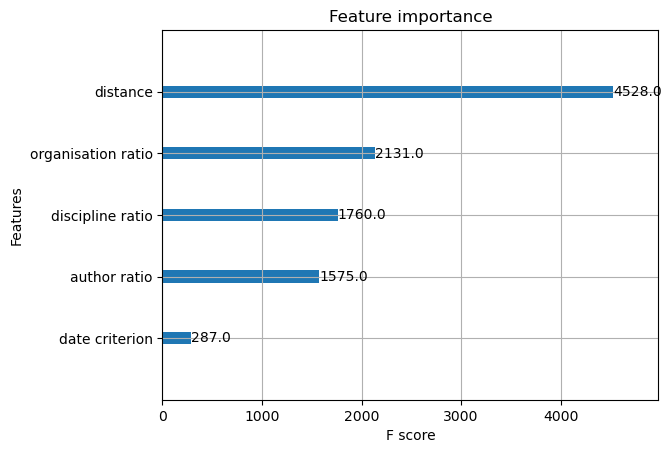

In [32]:
plot_importance(xgb_model)
plt.show()

[0]	test-logloss:0.59947


[100]	test-logloss:0.01526
[200]	test-logloss:0.01560
[300]	test-logloss:0.01585
[400]	test-logloss:0.01636
[500]	test-logloss:0.01646
[600]	test-logloss:0.01650
[700]	test-logloss:0.01652
[800]	test-logloss:0.01667
[900]	test-logloss:0.01676
[1000]	test-logloss:0.01688
[1070]	test-logloss:0.01697
0.9814814814814815
0.9814814814814815
0.9732510288065843
0.9670781893004115
0.9670781893004115
0.9547325102880658
0.948559670781893
0.9176954732510287
0.8806584362139918
0.6995884773662551


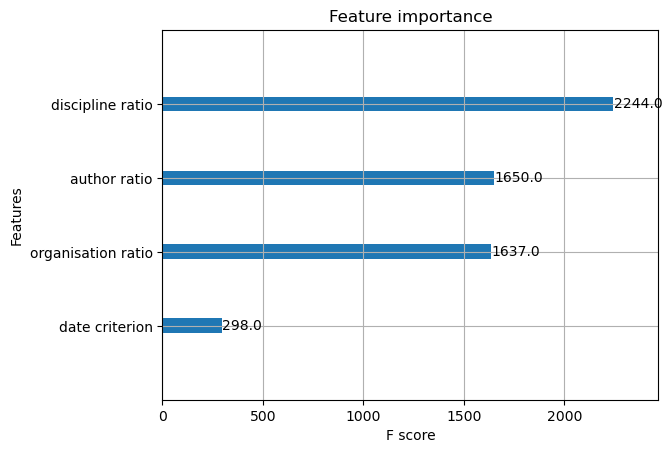

In [38]:
# drop distance column
gb_data_no_date = np.delete(gb_data, 4, 1)

X = gb_data_no_date[:, 1:]
y = gb_data_no_date[:, 0]

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3]]'
feature_names = ['date criterion', 'organisation ratio', 'author ratio', 'discipline ratio']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names, enable_categorical=True)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round, 
                      evals=[(dtest, 'test')], 
                      early_stopping_rounds=1000, 
                      verbose_eval=100)

# make three predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[len(train_pub_data):]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

plot_importance(xgb_model)
plt.show()

[0]	test-logloss:0.59935
[100]	test-logloss:0.01194
[200]	test-logloss:0.01208
[300]	test-logloss:0.01360
[400]	test-logloss:0.01409
[500]	test-logloss:0.01457
[600]	test-logloss:0.01524
[700]	test-logloss:0.01585
[800]	test-logloss:0.01611
[900]	test-logloss:0.01644
[1000]	test-logloss:0.01723
[1078]	test-logloss:0.01762
0.9876543209876543
0.9876543209876543
0.9814814814814815
0.9814814814814815
0.9814814814814815
0.9794238683127572
0.977366255144033
0.940329218106996
0.9032921810699589
0.7808641975308642


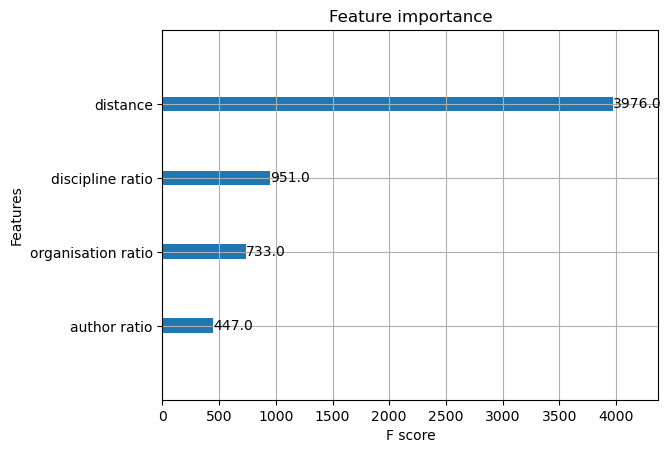

In [34]:
# drop date column
gb_data_no_date = np.delete(gb_data, 1, 1)

X = gb_data_no_date[:, 1:]
y = gb_data_no_date[:, 0]

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3]]'
feature_names = ['organisation ratio', 'author ratio', 'distance', 'discipline ratio']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names, enable_categorical=True)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round, 
                      evals=[(dtest, 'test')], 
                      early_stopping_rounds=1000, 
                      verbose_eval=100)

# make three predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[len(train_pub_data):]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

plot_importance(xgb_model)
plt.show()

In [40]:
# drop date and discipline column
gb_data_no_date = np.delete(gb_data, [1, 5], 1)

X = gb_data_no_date[:, 1:]
y = gb_data_no_date[:, 0]

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3]]'
feature_names = ['organisation ratio', 'author ratio', 'distance']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names, enable_categorical=True)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round, 
                      evals=[(dtest, 'test')], 
                      early_stopping_rounds=1000, 
                      verbose_eval=100)

# make three predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[len(train_pub_data):]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

plot_importance(xgb_model)
plt.show()

ValueError: ('feature_names must have the same length as data, ', 'expected 3, got 4')

[0]	test-logloss:0.59947
[100]	test-logloss:0.01537
[200]	test-logloss:0.01623
[300]	test-logloss:0.01673
[400]	test-logloss:0.01695
[500]	test-logloss:0.01707
[600]	test-logloss:0.01716
[700]	test-logloss:0.01723
[800]	test-logloss:0.01731
[900]	test-logloss:0.01744
[1000]	test-logloss:0.01757
[1076]	test-logloss:0.01761
0.9753086419753086
0.9691358024691358
0.9609053497942386
0.9609053497942386
0.9609053497942386
0.9609053497942386
0.9609053497942386
0.9300411522633745
0.8991769547325102
0.6502057613168724


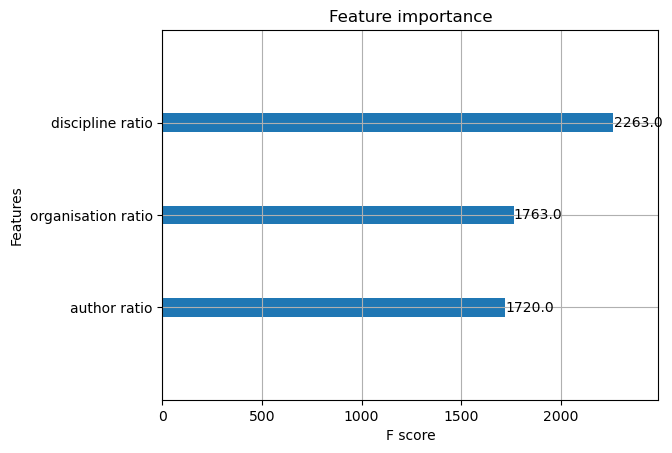

In [37]:
# drop date and distance column
gb_data_no_date = np.delete(gb_data, [1, 4], 1)

X = gb_data_no_date[:, 1:]
y = gb_data_no_date[:, 0]

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3]]'
feature_names = ['organisation ratio', 'author ratio', 'discipline ratio']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names, enable_categorical=True)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round, 
                      evals=[(dtest, 'test')], 
                      early_stopping_rounds=1000, 
                      verbose_eval=100)

# make three predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[len(train_pub_data):]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

plot_importance(xgb_model)
plt.show()

[0]	test-logloss:0.59950
[100]	test-logloss:0.01211
[200]	test-logloss:0.01216
[300]	test-logloss:0.01217
[400]	test-logloss:0.01218
[500]	test-logloss:0.01219
[600]	test-logloss:0.01221
[700]	test-logloss:0.01221
[800]	test-logloss:0.01224
[900]	test-logloss:0.01225
[1000]	test-logloss:0.01226
[1093]	test-logloss:0.01227
0.9938271604938271
0.9876543209876543
0.9876543209876543
0.9876543209876543
0.9753086419753086
0.9753086419753086
0.9753086419753086
0.9444444444444444
0.868312757201646
0.5823045267489713


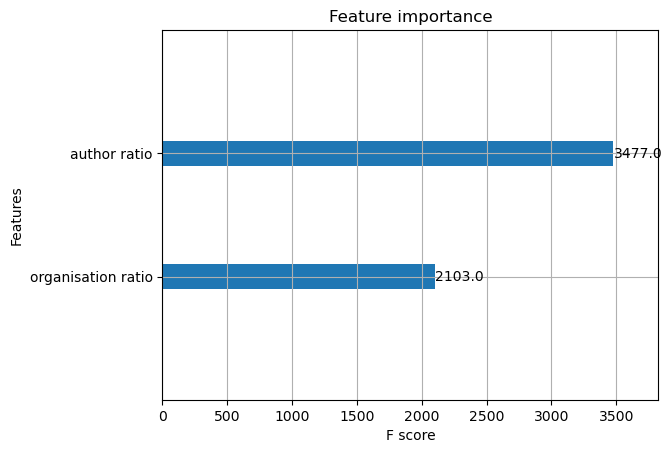

In [39]:
# drop date, discipline and distance column
gb_data_no_date = np.delete(gb_data, [1, 4, 5], 1)

X = gb_data_no_date[:, 1:]
y = gb_data_no_date[:, 0]

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3]]'
feature_names = ['organisation ratio', 'author ratio']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names, enable_categorical=True)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round, 
                      evals=[(dtest, 'test')], 
                      early_stopping_rounds=1000, 
                      verbose_eval=100)

# make three predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[len(train_pub_data):]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

plot_importance(xgb_model)
plt.show()

In [35]:
# support vector machine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X = gb_data[:, 1:]
y = gb_data[:, 0]

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
svc = SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)
print(clf.best_params_)

# make prediction
y_pred = clf.predict(X_test)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[len(train_pub_data):]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
0.24382716049382716
0.24382716049382716
0.24382716049382716
0.24382716049382716
0.24382716049382716
0.24382716049382716
0.24382716049382716
0.24382716049382716
0.2170781893004115
0.19032921810699588
